In [59]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib
import matplotlib.pyplot as plt

In [60]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [61]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [62]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [ ]:
print(engine.table_names())

In [63]:
# reflect an existing database into a new model
# Reflect Database into ORM classes
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
Base.classes.keys()



['measurement', 'station']

In [ ]:
result = engine.execute("SELECT * FROM measurement")
for row in result:
    print (row)
result.close()

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [64]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [65]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [66]:
# Find the most recent date in the data set.
#session.query(Measurements.date).group_by(Measurements.date).all()
session.query(func.max(Measurements.date)).all()

[('2017-08-23')]

In [67]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
data1 = session.query(func.max(Measurements.date),Measurements.prcp).all()
# Calculate the date one year from the last date in data set.
maxdate = '2017-08-23'
#maxdate was '2017-08-23'
mindate = '2016-08-23'

# Perform a query to retrieve the data and precipitation scores
data2 = session.query(Measurements.date,Measurements.prcp).\
    filter(Measurements.date < maxdate).\
    filter(Measurements.date > mindate).\
    group_by(Measurements.date).all()
data2





[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

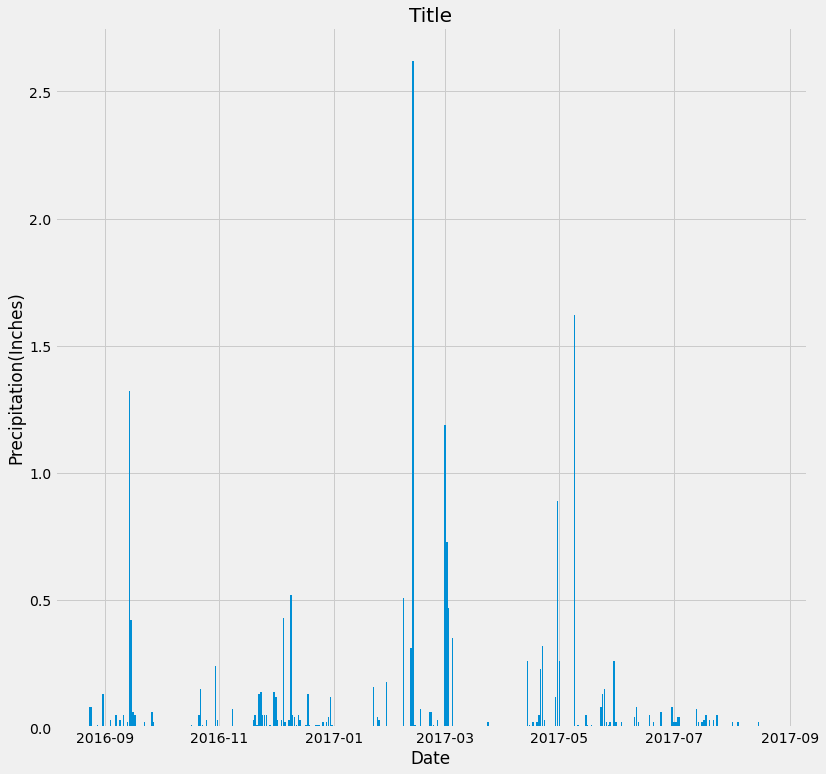

In [72]:
df = pd.DataFrame(data2, columns = ['date','prcp'])
df['date'] = pd.to_datetime(df['date'],format ='%Y-%m-%d', errors='coerce')
#newdata2 = [][]
i = 0
# Save the query results as a Pandas DataFrame and set the index to the date column
#for i in range(359):
#    newdata2[i][0] = (df.loc[i]['date'])
#    newdata2[i][1] = (df.loc[i]['prcp'])
#df = pd.DataFrame(data2, columns = ['date','prcp'])
#df
newdf = df.set_index('date')
# printing the dataframe
#newdf
#newdata2

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
#fig,ax1 = newdf.plot(kind="bar", title="Title")
fig, ax1 = plt.subplots(figsize=(12,12))
ax1.bar(df['date'], df['prcp'])
ax1.set(xlabel="Date", ylabel="Precipitation(Inches)", title="Title")
#date_form = DateFormatter('%m')
#ax1.xaxis.set_major_formatter(date_form)
#plt.minorticks_on()
plt.show()


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2011.000000
mean,0.176549
std,0.460667
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Stations.station)).all()

[(9)]

In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
data3 = session.query(Measurements.station, func.count(Measurements.tobs)).\
    group_by(Measurements.station).all()
data3

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
data4 = session.query(Measurements.station, Measurements.tobs).\
    filter(Measurements.station == 'USC00519397')
tempdf = pd.DataFrame(data4, columns = ['station','temp'])
tempdf.agg(['min','max', 'mean'])

,station,temp
min,USC00519397,56.000000
max,USC00519397,87.000000
mean,NaN,74.553231


In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data5 = session.query(Measurements.date,Measurements.tobs).\
    filter(Measurements.date < maxdate).\
    filter(Measurements.date > mindate).\
    group_by(Measurements.date).all()
data5

# Save the query results as a Pandas DataFrame and set the index to the date column
histdf = pd.DataFrame(data5, columns = ['date','tobs'])
#histdf
newhistdf = df.set_index('date')

,date,tobs
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
359,2017-08-18,0.00
360,2017-08-19,0.00
361,2017-08-20,0.00
362,2017-08-21,0.00


# Close session

In [58]:
# Close Session
session.close()